 <font size="10">Stabilité de la segmentation : score ARI</font>

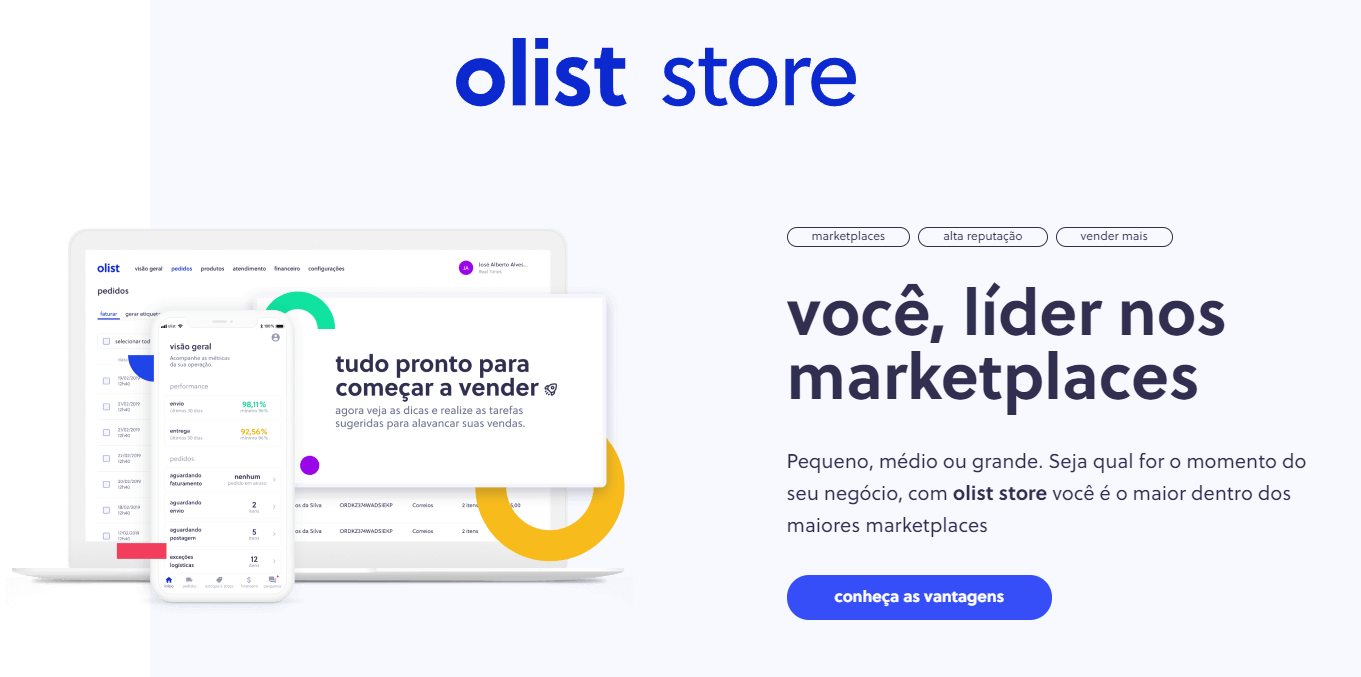

# Importation et préparation des données

Avant de commencer, nous vérifions que le code fourni respecte la convention PEP8.

In [1]:
# numpy and pandas pour la manipulation des données
import numpy as np
import pandas as pd
# matplotlib and seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# File system management
import os

# Suppress warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
from my_functions import *

In [3]:
df.head(2)

,customer_unique_id,nb_commandes,total_depense,moy_nb_moyens_paiements,moy_tot_versements_paiements,moy_review_score,moy_delai_livraison,autres,cadeaux,denrees_alimentaires,...,freight_ratio,moy_prix_commande,moy_prix_article,customer_zip_code_prefix,customer_city,j_derniere_commande,Etat_geo_client,geolocation_lat,geolocation_lng,d_harv
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.9,1.0,8.0,5.0,6.0,0.0,0.0,0.0,...,0.08,129.9,129.9,7787,cajamar,111,São Paulo,-23.340235,-46.830140,30.784607
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.9,1.0,1.0,4.0,3.0,0.0,0.0,0.0,...,0.30,18.9,18.9,6053,osasco,114,São Paulo,-23.559115,-46.787626,15.709783


# Stabilité temporelle

Pour obtenir une idée de la stabilité temporelle il faut déterminer les groupes d'appartenance des clients pour chaque période (t0, t0 + 1 mois, t0 + 2 mois etc ....).
Une fois cette étape effectuée, les appartenances aux groupes sont comparées pour chaque client. Cela se fait avec le score ARI, qui exprime la différence entre le résultat d'un modèle et le résultat attendu.
Dans notre cas, le score ARI (l'indice de Rand) donnera la différence entre les groupes d'appartenance à t0 et à t0 + 1 mois, t0 + 2 mois etc ...
Pour t0, nous prenons les clients qui ont passé commande AVANT le 1er janvier 2018 (ainsi nous englobons le pic du Black Friday 2017).

In [4]:
periode =  def_periode("2018-01-01 08:00:00","2018-09-01 08:00:00")
periode


*Fonction by Sandy M.*

['2018-01-01 08:00:00',
 '2018-01-31 08:00:00',
 '2018-03-02 08:00:00',
 '2018-04-01 08:00:00',
 '2018-05-01 08:00:00',
 '2018-05-31 08:00:00',
 '2018-06-30 08:00:00',
 '2018-07-30 08:00:00']

In [5]:
fin_init = periode[0]

Déterminons l'appartenance aux groupes pour les clients initiaux.

In [6]:
df_test = fe(fin_init)

In [7]:
X_init = prep_df_ari(df_test)
X_init 

,nb_commandes,total_depense,moy_nb_moyens_paiements,moy_tot_versements_paiements,moy_review_score,moy_delai_livraison,total_articles,freight_ratio,moy_prix_article,j_derniere_commande,d_harv,cat_differentes,kmeans_label
customer_unique_id,,,,,,,,,,,,,
0000f46a3911fa3c0805444483337064,1,69.00,1.0,8.0,3.0,26.0,1.0,0.20,69.00,296,487.145776,1,0
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,1.0,4.0,4.0,20.0,1.0,0.40,25.99,80,2480.782824,1,5
0004aac84e0df4da2b147fca70cf8255,1,180.00,1.0,6.0,5.0,13.0,1.0,0.09,180.00,47,85.358407,1,0
0005e1862207bf6ccc02e4228effd9a0,1,135.00,1.0,3.0,4.0,4.0,1.0,0.10,135.00,302,394.192918,1,1
0006fdc98a402fceb4eb0ee528f6a8d4,1,13.90,1.0,2.0,3.0,16.0,1.0,0.52,13.90,167,608.694762,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,1,149.00,1.0,2.0,5.0,19.0,1.0,0.11,149.00,4,2368.575119,1,5
fffcf5a5ff07b0908bd4e2dbc735a684,1,1570.00,1.0,10.0,5.0,28.0,2.0,0.24,785.00,206,2000.688657,1,3
fffea47cd6d3cc0a88bd621562a9d061,1,64.89,1.0,1.0,4.0,30.0,1.0,0.23,64.89,21,1498.216599,1,5


Maintenant, déterminons les clusters de chaque client et comparons les aux clusters initiaux.
Deux choses peuvent faire changer les clients de clusters :
1 : l'ajout de nouveaux clients au comportement différent, qui vont changer la répartition et la définition des groupes
2 : le changement de comportement des clients initiaux.
C'est pourquoi il est très important d'intégrer à la fois les clients initiaux et les nouveaux clients dans pour la détermination des clusters. Même si la comparaison ne se fera qu'à partir des clients initiaux.

In [8]:
resultats_ari = df_resultats_ari(periode,X_init )

In [9]:
resultats_ari

,dates,ari_periode
0,2018-01-01 08:00:00,0.994199
1,2018-01-31 08:00:00,0.975330
2,2018-03-02 08:00:00,0.925857
3,2018-04-01 08:00:00,0.884284
4,2018-05-01 08:00:00,0.881436
5,2018-05-31 08:00:00,0.883606
6,2018-06-30 08:00:00,0.892572
7,2018-07-30 08:00:00,0.345772


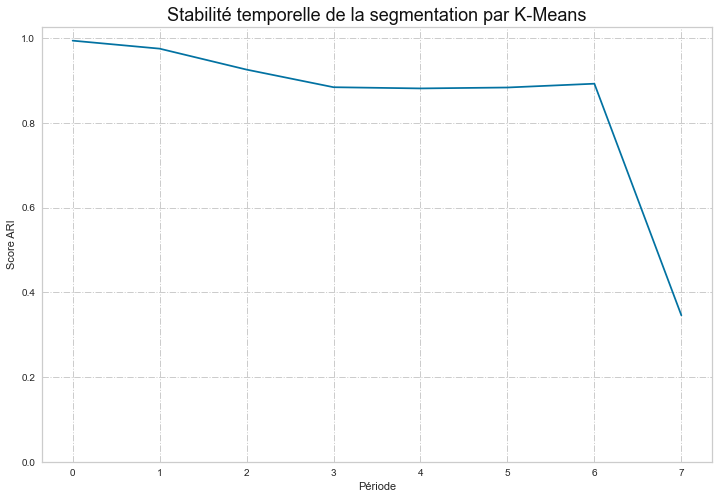

In [13]:
fig = plt.figure(figsize=(12, 8))
g = sns.lineplot(data=resultats_ari, x="dates", y="ari_periode")
g.set_xlabel("Période")
g.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
g.set_ylabel("Score ARI")
g.set_title("Stabilité temporelle de la segmentation par K-Means",
            fontsize=18,
            color="k")
g.set(ylim=(0, None))
g.grid(True, linestyle='-.')
plt.show()

Il est possible de remarquer qu'après 2 mois, la similarité de la répartition au sein des différents clusters passe sous la barre des 90%. Nous dirons qu'à partir de ce seuil, il faudra effectuer un recalcul des clusters pour les anciens et nouveaux clients.
Dans le cas de notre étude, nous préconisons alors une maintenance tous les deux mois.

# Conclusion de l'étude

En comparant les différents moyens d'évaluer la segmentation des clients de Olist (distortion, silhouette, Calinski-Harabasz, Davies-Bouldin) nous avons pu voir que la meilleure méthode était l'algorithme des K-means. Celle-ci nous propose 6 groupes, avec la proportion la plus équilibrée et facilement identifiable. Aussi, nous avons remarqué que notre segmentation était bien plus performante et parlante quand une réduction de dimension (transformation des variables et PCA) était opérée en amont.

Les groupes de clients qui ont été identifiés ont les caractéristiques suivantes :

Cluster 1 : Clients moyennement proches de Sao Paolo. Ils ont beaucoup apprécié leur produit et dépensé peu d'argent pour une seule commande.

Cluster 2 : Clients proches de Sao Paolo. Ils n'ont effectué qu'une seule commande, ont beaucoup apprécié leur produit et ont dépensé très peu d'argent mais leur ratio de frais de transport est important.

Cluster 3 : Les clients ont commandé très peu d'articles mais pour une somme un peu plus importante. Ils ont plutôt apprécié leurs achats. Dans notre classification RFM, ils correspondent à la catégorie des dépensiers.

Cluster 4 : Des clients très proches de Sao Paola. Ils ont faire leur dernière (et unique) commande il n'y a pas très longtemps. Ils n'ont pas dépensé beaucoup d'argent et ont commandé très peu d'articles. Ils ont plutôt bien apprécié leurs achats. Ils ont payé en plusieurs fois.

Cluster 5 : Ils se trouvent près de Sao Paolo. Ils ont commandé quelques articles dans des catégories de produits différentes. Ils ont moins apprécié leurs produits que les autres clusters. Ils ont tendance à avoir fait plusieurs commandes. Dans notre classification RFM, ils correspondent à la catégorie des habitués.

Cluster 6 : Clients en moyenne éloignés de Sao Paolo. Ils ont des délais de livraison plus important. Ils n'ont effectué qu'une seule commande, n'ont pas tellement apprécié leur produit et ont dépensé peu d'argent.

Les méthodes de segmentation RFM et K-means Mini-Batch sont un peu moins performantes mais donnent des premières informations très facilement et rapidement. Elles sont une piste à garder en tête quand la base de données s'étoffera au fil des années. Ces méthodes pourront être une première approche avant d'affiner les définitions des clusters avec des modèles plus complexes et plus gourmands en terme de temps.

L'indice de Rand est un excellent atout pour notre étude. Il peut comparer les attributions des clusters en fonction du temps par exemple. Il nous a ainsi permis de déterminer une période de stabilité du modèle afin de pouvoir organiser des maintenances à intervalles définis grâce à ce score.